# Mammographic Mass Data Set (UCI ML Repository)

Credit:<br>
This data set can be found from the websites below.<br>
https://sci2s.ugr.es/keel/dataset.php?cod=86<br>
http://archive.ics.uci.edu/ml/datasets/Mammographic+Mass<br>

This project mains to build a classification model to distinguish benign or maglinant mammographic mass based on BI-RADS attributes and the age of the patient.

Introduction to BI-RADS: https://radiologyassistant.nl/breast/bi-rads/bi-rads-for-mammography-and-ultrasound-2013

# 1. Data Set Introudction

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
# data set file being in the same path as this notebook
file = 'mammographic.dat'

for i in open(file).readlines():
    i.strip()
    i.split()
    print(i)

@relation mammographic

@attribute BI-RADS integer [0,6]

@attribute Age integer [18,96]

@attribute Shape integer [1,4]

@attribute Margin integer [1,5]

@attribute Density integer [1,4]

@attribute Severity {0, 1}

@inputs BI-RADS, Age, Shape, Margin, Density

@outputs Severity

@data

5,67,3,5,3,1

4,43,1,1,?,1

5,58,4,5,3,1

4,28,1,1,3,0

5,74,1,5,?,1

4,65,1,?,3,0

4,70,?,?,3,0

5,42,1,?,3,0

5,57,1,5,3,1

5,60,?,5,1,1

5,76,1,4,3,1

3,42,2,1,3,1

4,64,1,?,3,0

4,36,3,1,2,0

4,60,2,1,2,0

4,54,1,1,3,0

3,52,3,4,3,0

4,59,2,1,3,1

4,54,1,1,3,1

4,40,1,?,?,0

?,66,?,?,1,1

5,56,4,3,1,1

4,43,1,?,?,0

5,42,4,4,3,1

4,59,2,4,3,1

5,75,4,5,3,1

2,66,1,1,?,0

5,63,3,?,3,0

5,45,4,5,3,1

5,55,4,4,3,0

4,46,1,5,2,0

5,54,4,4,3,1

5,57,4,4,3,1

4,39,1,1,2,0

4,81,1,1,3,0

4,77,3,?,?,0

4,60,2,1,3,0

5,67,3,4,2,1

4,48,4,5,?,1

4,55,3,4,2,0

4,59,2,1,?,0

4,78,1,1,1,0

4,50,1,1,3,0

4,61,2,1,?,0

5,62,3,5,2,1

5,44,2,4,?,1

5,64,4,5,3,1

4,23,1,1,?,0

2,42,?,?,4,0

5,67,4,5,3,1

4,74,2,1,2,

- First 10 rows consist of statements that describe the features and their range of values.
- It also describe features and label of the data set.

In [4]:
data = np.genfromtxt(file, skip_header=10, delimiter=',')
print(data)

[[ 5. 67.  3.  5.  3.  1.]
 [ 4. 43.  1.  1. nan  1.]
 [ 5. 58.  4.  5.  3.  1.]
 ...
 [ 4. 64.  4.  5.  3.  0.]
 [ 5. 66.  4.  5.  3.  1.]
 [ 4. 62.  3.  3.  3.  0.]]


- nan become -1 when argument dtype is set to int.
- data read in is non-finite values

In [5]:
columns = ['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity']
df = pd.DataFrame(data, columns=columns)
df

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1.0
1,4.0,43.0,1.0,1.0,NaN,1.0
2,5.0,58.0,4.0,5.0,3.0,1.0
3,4.0,28.0,1.0,1.0,3.0,0.0
4,5.0,74.0,1.0,5.0,NaN,1.0
...,...,...,...,...,...,...
956,4.0,47.0,2.0,1.0,3.0,0.0
957,4.0,56.0,4.0,5.0,3.0,1.0
958,4.0,64.0,4.0,5.0,3.0,0.0
959,5.0,66.0,4.0,5.0,3.0,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   959 non-null    float64
 1   Age       956 non-null    float64
 2   Shape     930 non-null    float64
 3   Margin    913 non-null    float64
 4   Density   885 non-null    float64
 5   Severity  961 non-null    float64
dtypes: float64(6)
memory usage: 45.2 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BI-RADS,959.0,4.296142,0.706291,0.0,4.0,4.0,5.0,6.0
Age,956.0,55.487448,14.480131,18.0,45.0,57.0,66.0,96.0
Shape,930.0,2.721505,1.242792,1.0,2.0,3.0,4.0,4.0
Margin,913.0,2.796276,1.566546,1.0,1.0,3.0,4.0,5.0
Density,885.0,2.910734,0.380444,1.0,3.0,3.0,3.0,4.0
Severity,961.0,0.463059,0.498893,0.0,0.0,0.0,1.0,1.0


In [8]:
df.corr()

,BI-RADS,Age,Shape,Margin,Density,Severity
BI-RADS,1.000000,0.288232,0.405930,0.412952,0.082207,0.505132
Age,0.288232,1.000000,0.364077,0.411355,0.028954,0.432066
Shape,0.405930,0.364077,1.000000,0.742211,0.078666,0.563308
Margin,0.412952,0.411355,0.742211,1.000000,0.109392,0.574919
Density,0.082207,0.028954,0.078666,0.109392,1.000000,0.064010
Severity,0.505132,0.432066,0.563308,0.574919,0.064010,1.000000


only Density shares weak correlation with Severity (label).

what is Breast Imaging Reporting and Data System (BI-RADS): https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/mammograms/understanding-your-mammogram-report.html


# 2. Exploratory Data Analysis (EDA)

## 2.1 How many benign and malignant cases?

In [9]:
sns.set_theme(style='whitegrid')

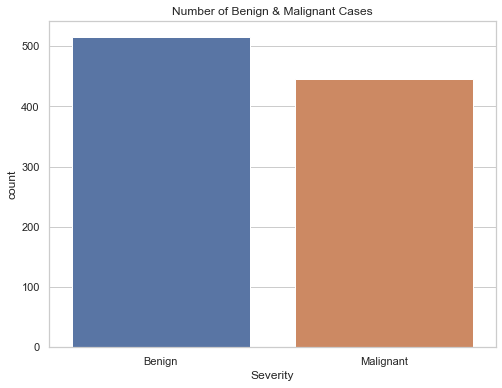

In [10]:
plt.subplots(figsize=(8,6))
g = sns.countplot(data=df, x='Severity')
g.set_title('Number of Benign & Malignant Cases')
g.set_xticklabels(['Benign','Malignant']);

- Lesser malignant than benign cases. 
- Dataset is slightly unbalanced between labels as this can result in some bias during classification.

## 2.2 Age demographic of data set.

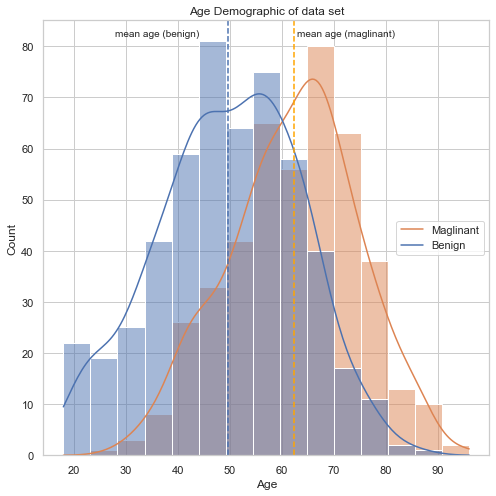

In [11]:
plt.subplots(figsize=(8,8))
sns.histplot(data=df, x='Age', bins=15, kde=True, hue='Severity')
plt.axvline(df.loc[df['Severity'] == 0].values[:,1].mean(), color='b', linestyle='--')
plt.axvline(np.nanmean(df.loc[df['Severity'] == 1].values[:,1]), color='orange', linestyle='--')
plt.legend(labels=['Maglinant',"Benign"], loc='center right')
plt.text(28,82,'mean age (benign)')
plt.text(63,82,'mean age (maglinant)')
plt.title('Age Demographic of data set')
plt.show()

- Range of age is the same regardless of severity case.
- Higher mean age of maglinant cases suggests either late detection (personal negligence) or older women are at higher risk of breast cancer.
- Null values of 'Age' appears only for maglinant cases.

## 2.3 What does mass density mean?

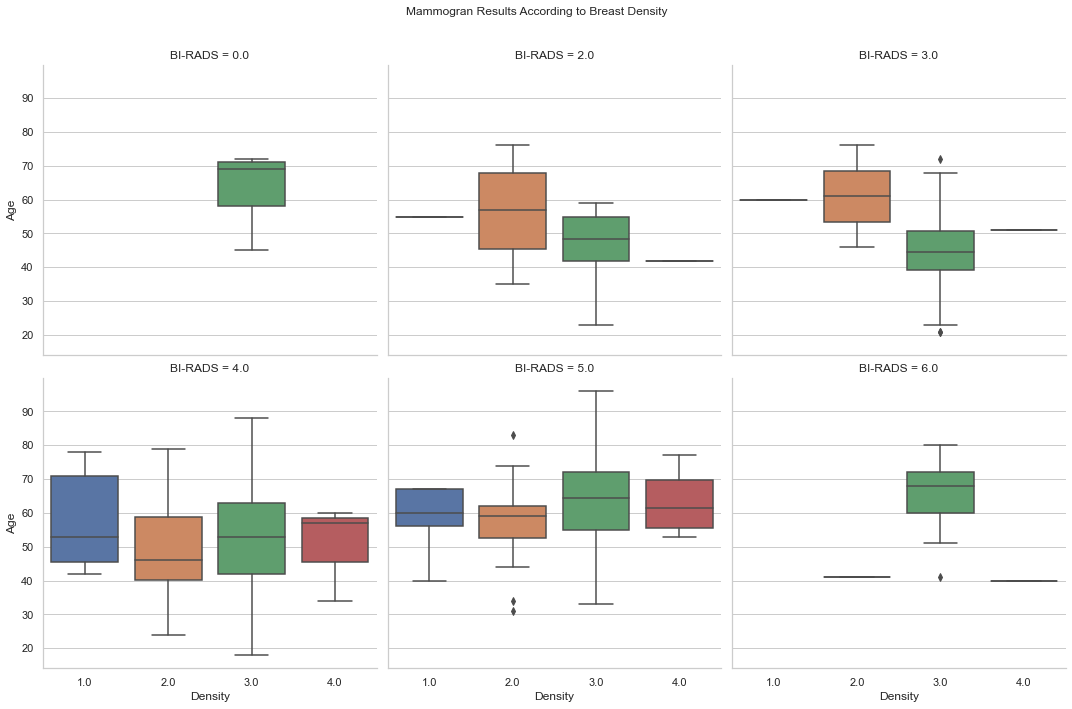

In [12]:
sns.catplot(data=df, x='Density', y='Age',
            kind='box', col='BI-RADS', col_wrap=3)
plt.subplots_adjust(top=0.9)
plt.suptitle('Mammogran Results According to Breast Density');

- In this data set, density refers to the density of mass found after mammogram. 1 being high density and 4 being low (fat containing). Fat containing masses are typically benign and high density is associated with malignancy.
- Majority of records have their density = 3 (green box appears in all subplots).
- BI-RADS category 4 (suspicious abnormality) & 5 (highly suggestive of malignancy) contains most records with mass density = 1, with median age around 50 to 60 years old (+- 5 years).

## 2.4 How does shape of mass relate with breast cancer?

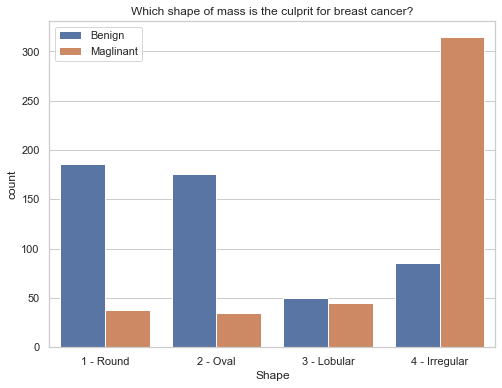

In [13]:
plt.subplots(figsize=(8,6))
g = sns.countplot(data=df, x='Shape', hue='Severity')
g.set_title('Which shape of mass is the culprit for breast cancer?')
g.legend(labels=['Benign', 'Maglinant'])
g.set_xticklabels(['1 - Round', '2 - Oval', '3 - Lobular', '4 - Irregular']);

- Neither round or oval shaped masses were high suspicion for breast cancer.
- Lobular shape could not give a distinct result, whether or not mass is benign or manglinant as the record suggested nearly a 50-to-50 ratio. Further investigation are required.
- Since each shape has their count of maglinant cases, presence of mass should not be taken lightly.

## 2.5 How well were masses being detected?

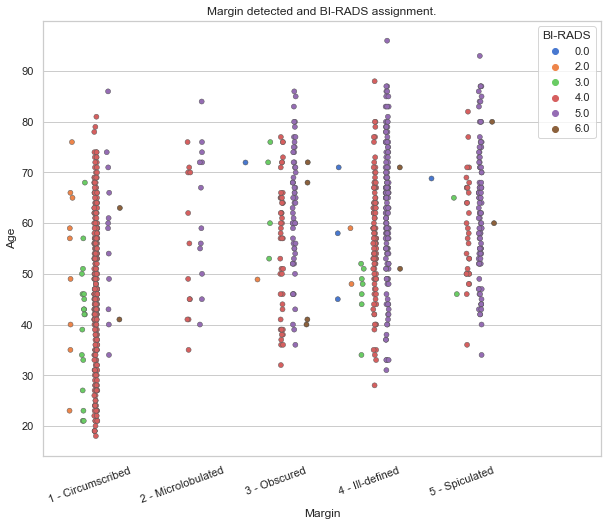

In [14]:
plt.subplots(figsize=(10,8))
g = sns.stripplot(data=df, x='Margin', y='Age', palette='muted',
                  hue='BI-RADS', dodge=True, linewidth=0.5)
g.set_title('Margin detected and BI-RADS assignment.')
g.set_xticklabels(['1 - Circumscribed', '2 - Microlobulated',
                   '3 - Obscured', '4 - Ill-defined',
                   '5 - Spiculated'], rotation=20);

- There are few records with masses being obscured and ill-defined are given BI-RADS group 2 result. This is dangerous as this is an indication of false negatives. These records should have margin of value 1 (circumscribed).
- From this population of records, women of age below 30 generally went through mammogram smoothly with masses well detected.

## 2.6 Checking of null values

In [15]:
df.isna().sum().sort_values()

Severity     0
BI-RADS      2
Age          5
Shape       31
Margin      48
Density     76
dtype: int64

In [16]:
# checking 5% of records of the data set
0.05 * len(df)

48.050000000000004

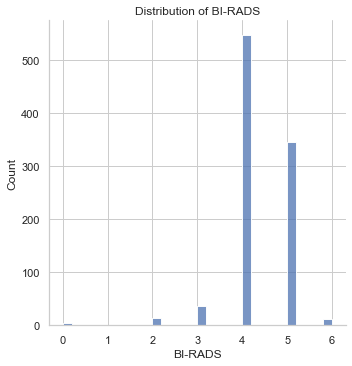

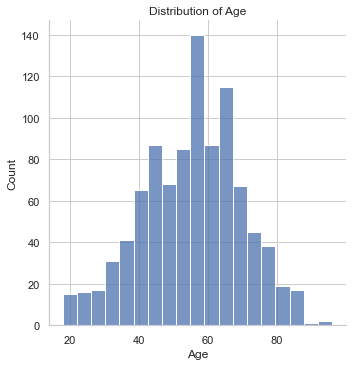

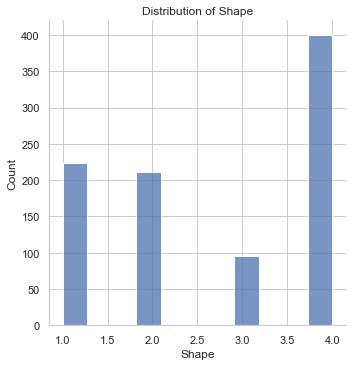

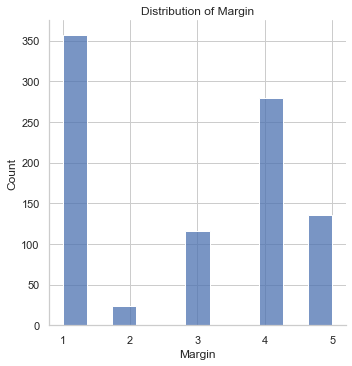

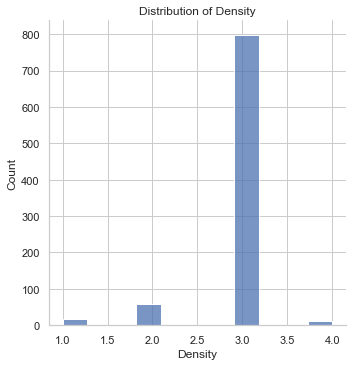

In [17]:
columns = df.columns.drop('Severity')
for col in columns:
    sns.displot(data=df, x=col)
    plt.title(f'Distribution of {col}');

- BI-RADS, Shape, Margin & Density though numeric represented, are categorical features. They will be imputed by the mode of its own column.
- Age is a numeric feature. As its distribution is fairly normal. Imputing missing values with median will be good choice (not influnced by outliers).

# 3. Preparing Data Set (Cleaning)

Split the original data set into a training data set and test data set.

In [18]:
# define a constant variable for random_sate for reproductibility
RANDOM_SEED = 2

In [19]:
# split the data set into 2 separate data frame
train_df = df.sample(frac=0.8, random_state=RANDOM_SEED)
test_df = df.drop(train_df.index)

print(f'Shape of train_df: {train_df.shape}')
print(f'Shape of test_df: {test_df.shape}')

Shape of train_df: (769, 6)
Shape of test_df: (192, 6)


Write functions to impute missing values in training and testing data set.
- a function to impute missing values by mode
- a function to impute missing values by median

In [30]:
def impute_by_mode(dataset, column_name):
    '''Imputes missing values within a column of the dataframe by utilising python .mode() method.
    
    Parameters
    ----------
    dataset : pandas.core.series.Series
        The dataframe in which to passed in
    column_name : str
        Name of the column for missing values imputation
        
    Returns
    -------
    NoneType
        The most frequent value which appear, within the column, is being imputed into the column  
    '''
    
    dataset[column_name].fillna(train_df[column_name].mode()[0], inplace=True)
       
    print(f'Missing values have been imputed.')
    print(f'Amount of missing values in column {column_name}: {dataset[column_name].isna().sum()}')
    
    return None
    

In [31]:
def impute_by_median(dataset, column_name):
    '''Imputes missing values within a column of the dataframe by utilising python .median() method.
    
    Parameters
    ----------
    dataset : pandas.core.series.Series
        The dataframe in which to passed in
    column_name : str
        Name of the column for missing values imputation
        
    Returns
    -------
    NoneType
        The median value of the column being imputed into the column  
    '''
    
    dataset[column_name].fillna(train_df[column_name].median(), inplace=True)
       
    print(f'Missing values have been imputed.')
    print(f'Amount of missing values in column {column_name}: {dataset[column_name].isna().sum()}')
    
    return None

## 3.1 Imputation of null values

In [32]:
impute_by_median(train_df, 'Age')

Missing values have been imputed.
Amount of missing values in column Age: 0


In [33]:
cols_to_impute = ['BI-RADS', 'Shape', 'Margin', 'Density']
for col in cols_to_impute:
    impute_by_mode(train_df, col)

Missing values have been imputed.
Amount of missing values in column BI-RADS: 0
Missing values have been imputed.
Amount of missing values in column Shape: 0
Missing values have been imputed.
Amount of missing values in column Margin: 0
Missing values have been imputed.
Amount of missing values in column Density: 0


In [34]:
impute_by_median(test_df, 'Age')

Missing values have been imputed.
Amount of missing values in column Age: 0


In [35]:
cols_to_impute = ['BI-RADS', 'Shape', 'Margin', 'Density']
for col in cols_to_impute:
    impute_by_mode(test_df, col)

Missing values have been imputed.
Amount of missing values in column BI-RADS: 0
Missing values have been imputed.
Amount of missing values in column Shape: 0
Missing values have been imputed.
Amount of missing values in column Margin: 0
Missing values have been imputed.
Amount of missing values in column Density: 0


In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 769 entries, 846 to 832
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   769 non-null    float64
 1   Age       769 non-null    float64
 2   Shape     769 non-null    float64
 3   Margin    769 non-null    float64
 4   Density   769 non-null    float64
 5   Severity  769 non-null    float64
dtypes: float64(6)
memory usage: 42.1 KB


In [37]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 958
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BI-RADS   192 non-null    float64
 1   Age       192 non-null    float64
 2   Shape     192 non-null    float64
 3   Margin    192 non-null    float64
 4   Density   192 non-null    float64
 5   Severity  192 non-null    float64
dtypes: float64(6)
memory usage: 10.5 KB


# 4 Export Data Set

The train_df and test_df is now ready for machine learning phase. We export both data frames into .csv format so that it can be imported into a separate .py file for ml actions.

In [38]:
train_df.to_csv('train_df.csv')
test_df.to_csv('test_df.csv')